In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))
from micrograd.engine import Value
from micrograd.layers import MLP
from micrograd.loss import ce_loss
from micrograd.optimizers import SGD
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
SEED = 38

In [2]:
from sklearn.datasets import make_circles

xs, ys = make_circles(400, noise=0.03, random_state=SEED)
print(xs[:5])
print(ys[:5])

[[-0.68461827  0.79048509]
 [-0.76576602 -0.06938644]
 [ 0.14745633  0.95470233]
 [ 0.59864748 -0.50582858]
 [ 0.84196994  0.15981494]]
[0 1 0 1 1]


In [3]:
circles = pd.DataFrame({"x1": xs[:, 0], "x2": xs[:, 1], "label":ys})
circles.head(20)

,x1,x2,label
0,-0.684618,0.790485,0
1,-0.765766,-0.069386,1
2,0.147456,0.954702,0
3,0.598647,-0.505829,1
4,0.841970,0.159815,1
5,0.934837,-0.229099,0
6,-0.035324,1.052760,0
7,0.681012,-0.679318,0
8,-0.715048,0.228144,1
9,0.593558,0.541840,1


In [15]:
circles.label.value_counts()

label
0    200
1    200
Name: count, dtype: int64

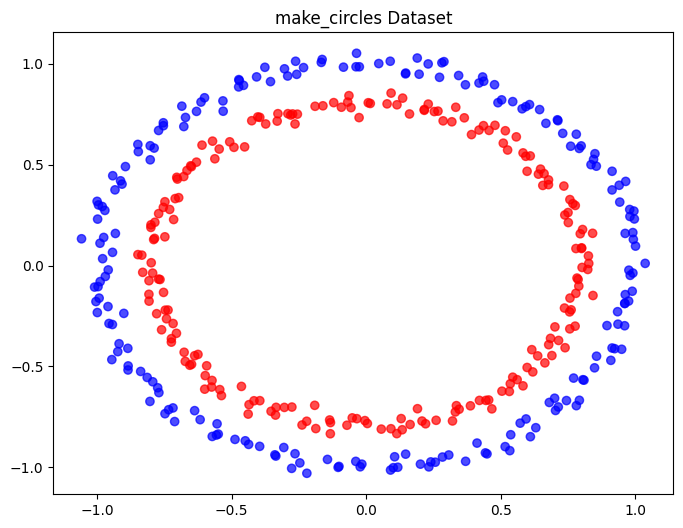

In [5]:
# Plotting data before training
# Our task is to classify each of these cirlces into either red or blue label
plt.figure(figsize=(8,6))
plt.scatter(xs[:,0], xs[:,1], c=ys, cmap='bwr', alpha=0.7)
plt.title("make_circles Dataset")
plt.show()

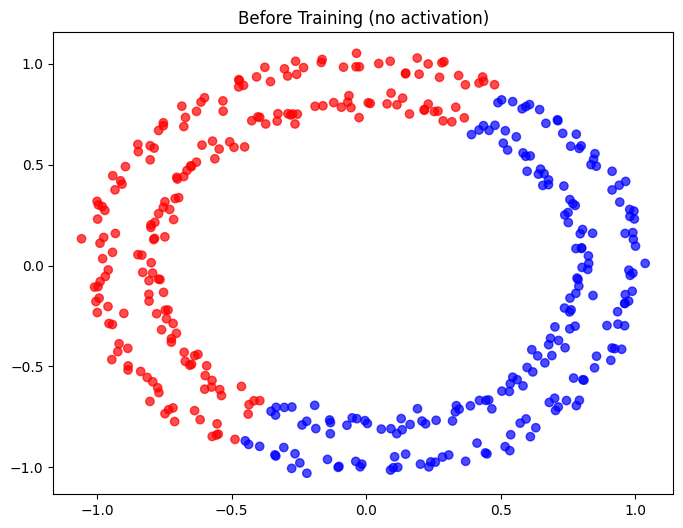

Accuracy: 0.4975


In [6]:
# Initializing model with no activation function
random.seed(SEED)
model_lin = MLP(2, [32, 32, 2], activation=None)
params_lin = model_lin.parameters()
optimizer = SGD(params_lin, lr=0.05)

# Before training
preds = [model_lin([Value(xi) for xi in x]) for x in xs]
before_preds = [np.argmax([p.data for p in pred]) for pred in preds]

plt.figure(figsize=(8,6))
plt.scatter(xs[:,0], xs[:,1], c=before_preds, cmap='bwr', alpha=0.7)
plt.title("Before Training (no activation)")
plt.show()

accuracy = np.mean(before_preds == ys)
print(f"Accuracy: {accuracy}")

In [7]:
# Training loop
for epoch in range(100):
    preds = [model_lin([Value(xi) for xi in x]) for x in xs]
    loss = ce_loss(preds, ys)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch: {epoch} || Loss: {loss.data}")
    if epoch % 10 == 0:
        accuracy = np.mean([np.argmax([p.data for p in pred]) for pred in preds] == ys)
        print(f"Accuracy: {accuracy}")

Epoch: 0 || Loss: 0.9862084755582067
Accuracy: 0.4975
Epoch: 1 || Loss: 1.2093606684443268
Epoch: 2 || Loss: 1.1996811857405592
Epoch: 3 || Loss: 1.1905423395419843
Epoch: 4 || Loss: 1.1694541707100115
Epoch: 5 || Loss: 1.1631384831330818
Epoch: 6 || Loss: 1.142994786356949
Epoch: 7 || Loss: 1.1367183987600589
Epoch: 8 || Loss: 1.117993531761054
Epoch: 9 || Loss: 1.111693529525772
Epoch: 10 || Loss: 1.094288258123122
Accuracy: 0.5
Epoch: 11 || Loss: 1.088009248538268
Epoch: 12 || Loss: 1.071815691421469
Epoch: 13 || Loss: 1.0655970781217692
Epoch: 14 || Loss: 1.0505179619100757
Epoch: 15 || Loss: 1.0443918651109072
Epoch: 16 || Loss: 1.0303397206149156
Epoch: 17 || Loss: 1.0243320311296629
Epoch: 18 || Loss: 1.0112279714667822
Epoch: 19 || Loss: 1.0053593058678127
Epoch: 20 || Loss: 0.993131955798612
Accuracy: 0.5
Epoch: 21 || Loss: 0.9874184650666312
Epoch: 22 || Loss: 0.9760030450931949
Epoch: 23 || Loss: 0.9704570990550196
Epoch: 24 || Loss: 0.9597946427189845
Epoch: 25 || Loss: 0.9

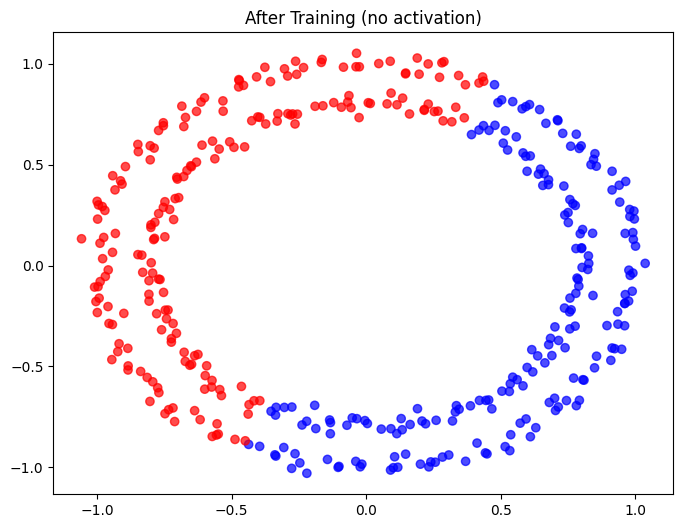

Accuracy: 0.4975


In [8]:
final = [model_lin((Value(x[0]), Value(x[1]))) for x in xs]
final_preds = [np.argmax([p.data for p in pred]) for pred in final]

plt.figure(figsize=(8,6))
plt.scatter(xs[:,0], xs[:,1], c=final_preds, cmap='bwr', alpha=0.7)
plt.title("After Training (no activation)")
plt.show()

accuracy = np.mean(final_preds == ys)
print(f"Accuracy: {accuracy}")

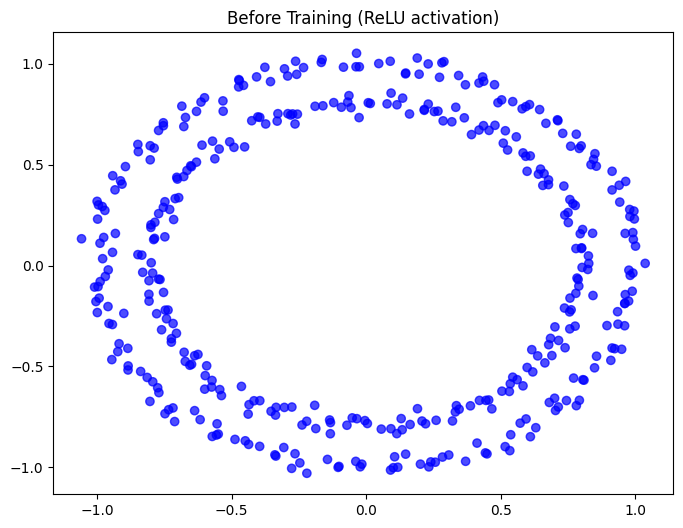

Accuracy: 0.5


In [9]:
# Initializing model with ReLU activation
random.seed(SEED)
model_relu = MLP(2, [32, 32, 2], activation="ReLU")
params_relu = model_relu.parameters()
optimizer = SGD(params_relu, lr=0.05)

preds = [model_relu([Value(xi) for xi in x]) for x in xs]
before_preds = [np.argmax([p.data for p in pred]) for pred in preds]

plt.figure(figsize=(8,6))
plt.scatter(xs[:,0], xs[:,1], c=before_preds, cmap='bwr', alpha=0.7)
plt.title("Before Training (ReLU activation)")
plt.show()

accuracy = np.mean(before_preds == ys)
print(f"Accuracy: {accuracy}")

In [10]:
# Training loop
for epoch in range(100):
    preds = [model_relu([Value(xi) for xi in x]) for x in xs]
    loss = ce_loss(preds, ys)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch: {epoch} || Loss: {loss.data}")
    if epoch % 10 == 0:
        accuracy = np.mean([np.argmax([p.data for p in pred]) for pred in preds] == ys)
        print(f"Accuracy: {accuracy}")

Epoch: 0 || Loss: 0.9564629260526681
Accuracy: 0.5
Epoch: 1 || Loss: 0.763085574000116
Epoch: 2 || Loss: 0.7216335485058539
Epoch: 3 || Loss: 0.7087490036662358
Epoch: 4 || Loss: 0.6992733279107627
Epoch: 5 || Loss: 0.6916104099363729
Epoch: 6 || Loss: 0.6851328594862639
Epoch: 7 || Loss: 0.6795037123585855
Epoch: 8 || Loss: 0.6744614735627421
Epoch: 9 || Loss: 0.6700286419385441
Epoch: 10 || Loss: 0.6660507835221385
Accuracy: 0.59
Epoch: 11 || Loss: 0.6623610013162734
Epoch: 12 || Loss: 0.6589609491440618
Epoch: 13 || Loss: 0.6558574237476578
Epoch: 14 || Loss: 0.652929142510294
Epoch: 15 || Loss: 0.6501051161816919
Epoch: 16 || Loss: 0.64744861542859
Epoch: 17 || Loss: 0.6449176670333087
Epoch: 18 || Loss: 0.642542712170031
Epoch: 19 || Loss: 0.6402932468881312
Epoch: 20 || Loss: 0.6381688243614783
Accuracy: 0.7425
Epoch: 21 || Loss: 0.6361348717963993
Epoch: 22 || Loss: 0.6341539541081047
Epoch: 23 || Loss: 0.632160397630112
Epoch: 24 || Loss: 0.6302036029778515
Epoch: 25 || Loss: 0

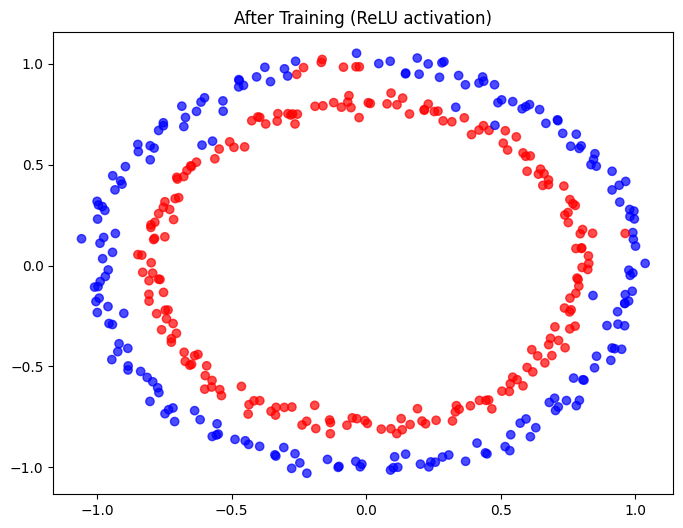

Accuracy: 0.9675


In [11]:
final = [model_relu((Value(x[0]), Value(x[1]))) for x in xs]
final_preds = [np.argmax([p.data for p in pred]) for pred in final]

plt.figure(figsize=(8,6))
plt.scatter(xs[:,0], xs[:,1], c=final_preds, cmap='bwr', alpha=0.7)
plt.title("After Training (ReLU activation)")
plt.show()

accuracy = np.mean(final_preds == ys)
print(f"Accuracy: {accuracy}")

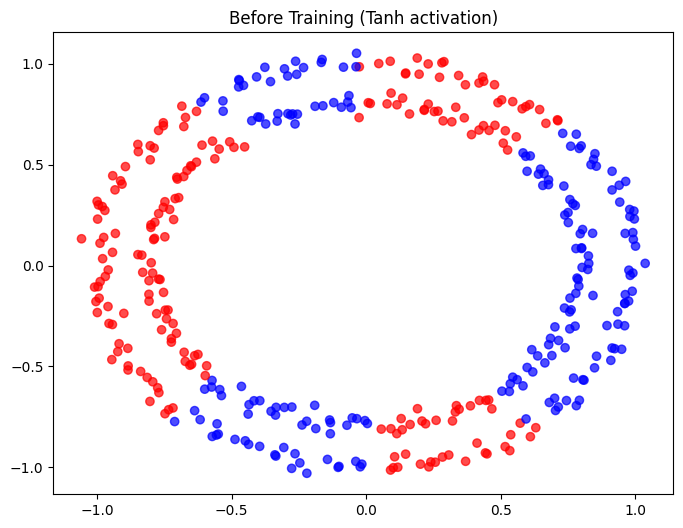

Accuracy: 0.4925


In [12]:
# Initializing model with Tanh activation
random.seed(SEED)
model_tanh = MLP(2, [32, 32, 2], "tanh")
tanh_params = model_tanh.parameters()
optimizer = SGD(tanh_params, lr=0.05)

preds = [model_tanh([Value(xi) for xi in x]) for x in xs]
before_preds = [np.argmax([p.data for p in pred]) for pred in preds]

plt.figure(figsize=(8,6))
plt.scatter(xs[:,0], xs[:,1], c=before_preds, cmap='bwr', alpha=0.7)
plt.title("Before Training (Tanh activation)")
plt.show()

accuracy = np.mean(before_preds == ys)
print(f"Accuracy: {accuracy}")

In [13]:
# Training loop
for epoch in range(100):
    preds = [model_tanh([Value(xi) for xi in x]) for x in xs]
    loss = ce_loss(preds, ys)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f"Epoch: {epoch} || Loss: {loss.data}")
    if epoch % 10 == 0:
        accuracy = np.mean([np.argmax([p.data for p in pred]) for pred in preds] == ys)
        print(f"Accuracy: {accuracy}")

Epoch: 0 || Loss: 0.8224002740830229
Accuracy: 0.4925
Epoch: 1 || Loss: 0.7816555960028412
Epoch: 2 || Loss: 0.7633712050004715
Epoch: 3 || Loss: 0.752510756527679
Epoch: 4 || Loss: 0.7443162770665592
Epoch: 5 || Loss: 0.7373407110597271
Epoch: 6 || Loss: 0.7311225976440403
Epoch: 7 || Loss: 0.7254937199465692
Epoch: 8 || Loss: 0.7203755834737685
Epoch: 9 || Loss: 0.7157183531458213
Epoch: 10 || Loss: 0.7114819664982731
Accuracy: 0.5275
Epoch: 11 || Loss: 0.7076302115084682
Epoch: 12 || Loss: 0.7041289716530926
Epoch: 13 || Loss: 0.7009458421900879
Epoch: 14 || Loss: 0.6980501736972559
Epoch: 15 || Loss: 0.6954132106558218
Epoch: 16 || Loss: 0.6930082099047427
Epoch: 17 || Loss: 0.6908105050576844
Epoch: 18 || Loss: 0.6887975138908863
Epoch: 19 || Loss: 0.68694869683709
Epoch: 20 || Loss: 0.6852454778058699
Accuracy: 0.55
Epoch: 21 || Loss: 0.6836711383699456
Epoch: 22 || Loss: 0.6822106949350615
Epoch: 23 || Loss: 0.6808507667310645
Epoch: 24 || Loss: 0.6795794407112861
Epoch: 25 || L

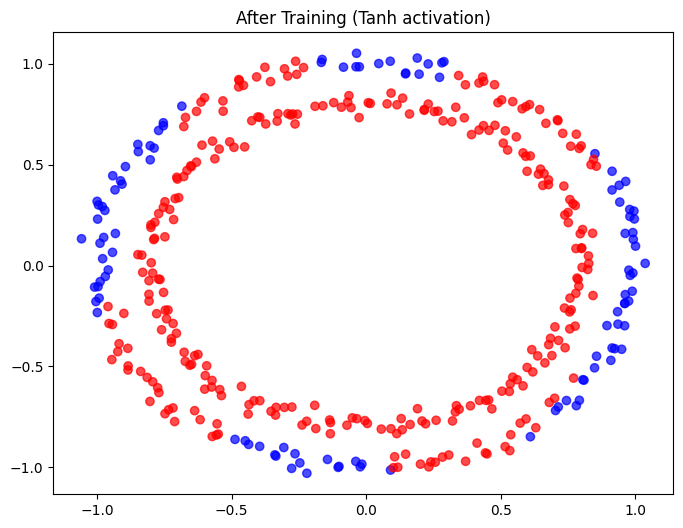

Accuracy: 0.77


In [14]:
preds = [model_tanh([Value(xi) for xi in x]) for x in xs]
final_preds = [np.argmax([p.data for p in pred]) for pred in preds]

plt.figure(figsize=(8,6))
plt.scatter(xs[:,0], xs[:,1], c=final_preds, cmap='bwr', alpha=0.7)
plt.title("After Training (Tanh activation)")
plt.show()

accuracy = np.mean(final_preds == ys)
print(f"Accuracy: {accuracy}")